In [1664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [1665]:
# read the data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1666]:
bike.shape

(730, 16)

In [1667]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1668]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1669]:
bike.drop('instant',axis=1,inplace=True)

In [1670]:
bike.drop('dteday',axis=1,inplace=True)
bike.drop('casual',axis=1,inplace=True)
bike.drop('registered',axis=1,inplace=True)


In [1671]:
bike.drop('atemp',axis=1,inplace=True)

In [1672]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


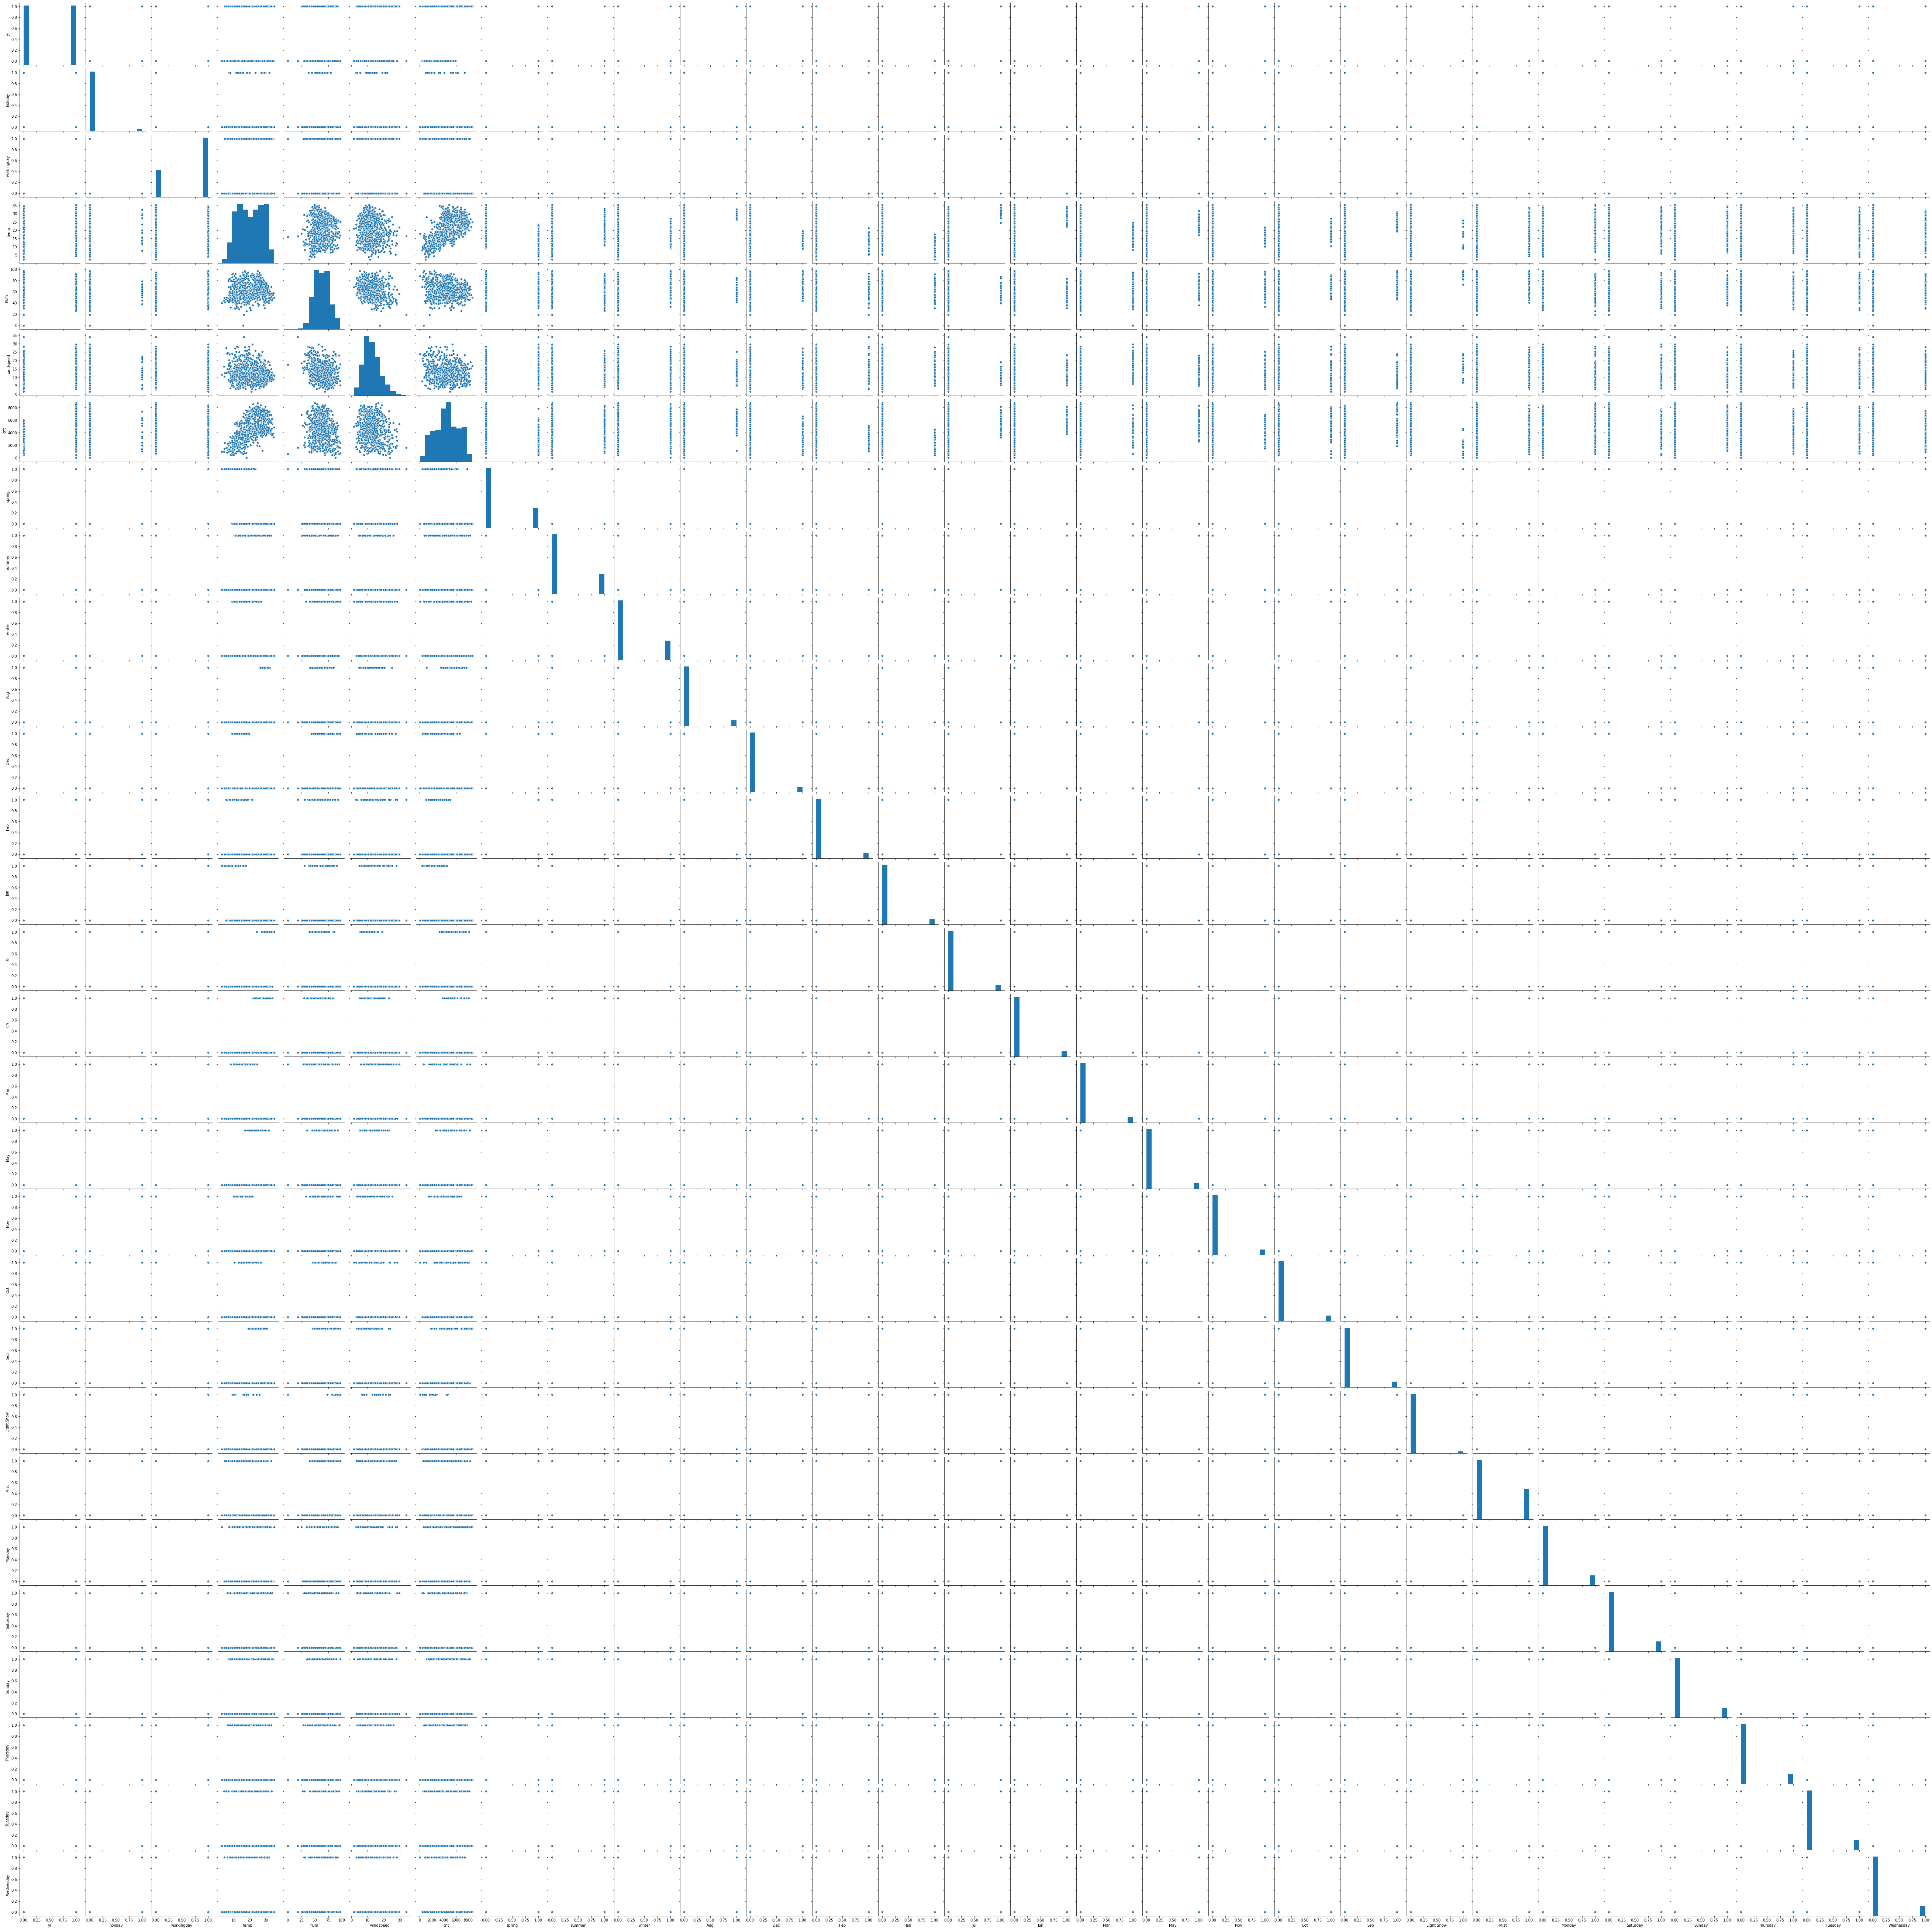

In [1702]:
sns.pairplot(bike)
plt.show()

In [1674]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1675]:
bike['season'] = bike['season'].astype('str')
bike[['season']] = bike[['season']].apply(lambda x : x.map({'1':"spring",'2':"summer",'3':"fall",'4':"winter"}))

In [1676]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.9+ KB


In [1677]:
bike['weekday'] = bike['weekday'].astype('str')
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({'0':"Tuesday",'1':"Wednesday",'2':"Thursday",'3':"Friday",'4':"Saturday",'5':"Sunday",'6':"Monday"}))

In [1678]:
#bike['weekday'] = bike['weekday'].astype('str')
#bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({'0':"Sunday",'1':"Monday",'2':"Tuesday",'3':"Wednesday",'4':"Thursday",'5':"Friday",'6':"Saturday"}))

In [1679]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Monday,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,1,9.305237,43.6957,12.522300,1600


In [1680]:
bike['weathersit'] = bike['weathersit'].astype('str')
bike[['weathersit']] = bike[['weathersit']].apply(lambda x: x.map({'1':"Clear",'2':"Mist",'3':"Light Snow",'4':"Heavy Rain"}))

In [1681]:
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [1682]:
bike['mnth'].value_counts()
bike['mnth'] = bike['mnth'].astype('str')
bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({'1':"Jan",'2':"Feb",'3':"Mar",'4':"Apr",'5':"May",'6':"Jun",'7':"Jul",'8':"Aug",'9':'Sep','10':"Oct",'11':"Nov",'12':"Dec"}))

<function matplotlib.pyplot.show(*args, **kw)>

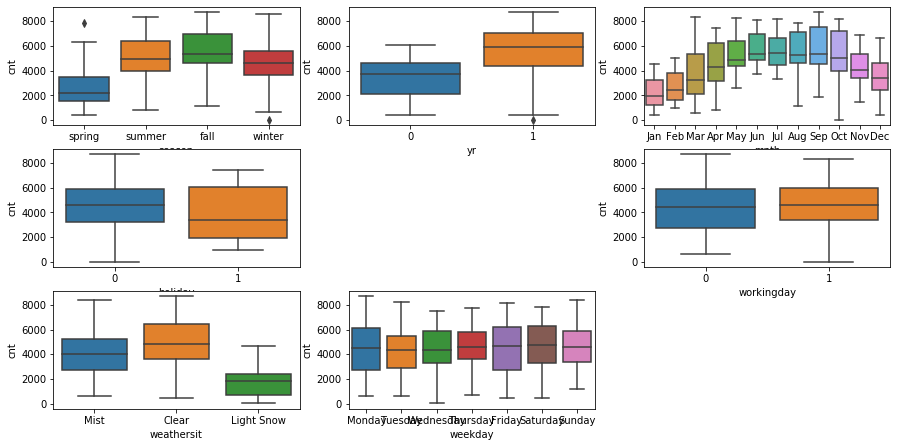

In [1683]:
# now visualize categorical variable ( better wth box plot)
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(4,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(4,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=bike)

plt.subplot(4,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)

plt.subplot(4,3,8)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.subplot(4,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.show


plt.subplot(4,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show

# creating categorical variables to dummy
- season , month , weathersit , weekday

In [1684]:
season = pd.get_dummies(bike['season'],drop_first=True)
month = pd.get_dummies(bike['mnth'],drop_first=True)
weather = pd.get_dummies(bike['weathersit'],drop_first=True)
weekday = pd.get_dummies(bike['weekday'],drop_first=True)

In [1685]:
season.head() # fall is dropped
month.head() # april is dropped
weather.head() # Clear is dropped
weekday.head() # Friday is dropped

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1686]:
bike = pd.concat([bike,season],axis=1)

In [1687]:
bike.head()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
dtypes: float64(3), int64(4), object(4), uint8(3)
memory usage: 65.0+ KB


In [1688]:
bike.drop(['season'],axis =1 , inplace=True)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Monday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [1689]:
bike=pd.concat([bike,month],axis=1)

In [1690]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Monday,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [1691]:
bike.drop(['mnth'],axis =1 , inplace=True)

In [1692]:
bike=pd.concat([bike,weather],axis=1)

In [1693]:
bike.drop(['weathersit'],axis =1 , inplace=True)

In [1694]:
bike=pd.concat([bike,weekday],axis=1)

In [1695]:
bike.drop(['weekday'],axis =1 , inplace=True)

In [1696]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

- removing categorical variables to make n - 1 ,( Monday , Jan , fall , Clear )

In [1697]:
#bike.drop(['Monday'],axis =1 , inplace=True)
#bike.drop(['Jan'],axis =1 , inplace=True)
#bike.drop(['fall'],axis =1 , inplace=True)
#bike.drop(['Clear'],axis =1 , inplace=True)

Splitting the Data into Training and Test Sets

In [1698]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(bike,train_size=0.70,test_size=0.30,random_state=100)

Rescaling the Features , will be using MinMax scaling

In [1699]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1700]:
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.029412,0.343137,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.169124,0.475223,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


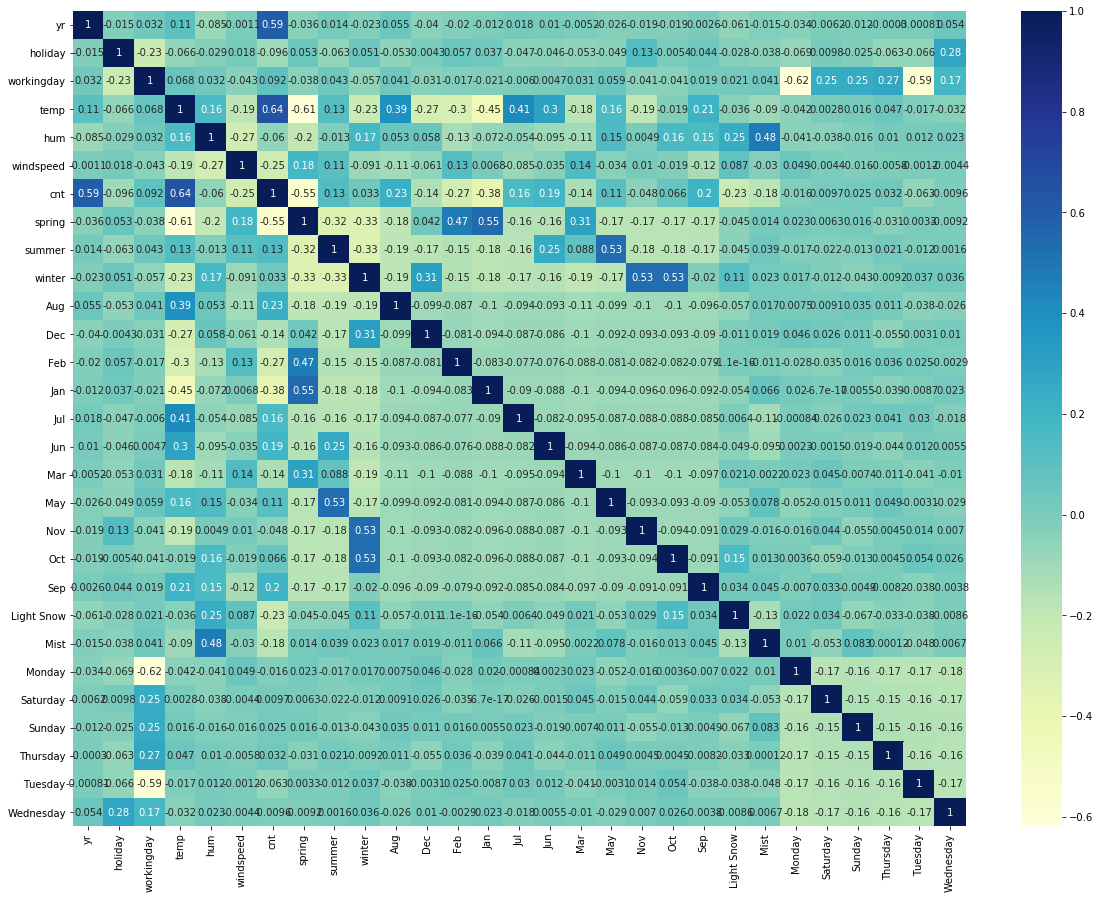

In [1701]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dividing into X and Y sets for the model building

In [1602]:
y_train = df_train.pop('cnt')
X_train = df_train

Building the Model using RFE

In [1603]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1604]:
bike.shape

(730, 29)

In [1605]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,29)
rfe = rfe.fit(X_train,y_train)

In [1606]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1)]

In [1607]:
col  = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow', 'Mist', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

Build the model using statsmodel

In [1608]:
X_train_rfe = X_train[col]

In [1609]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [1610]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [1611]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          8.74e-182
Time:                        12:37:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2429      0.035      6.854      0.000       0.173       0.313
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday        0.0067      0.024      0.278      0.781      -0.041       0.054
workingday     0.0937      0.012      7.783      0.000       0.070       0.117
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer         0.0387      0.026      1.478      0.140      -0.013       0.090
winter         0.1058      0.028      3.794      0.000       0.051       0.161
Aug            0.0144      0.034      0.428      0.669      -0.052       0.081
Dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
Jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar            0.0010      0.025      0.043      0.966      -0.047       0.049
May            0.0239      0.021      1.140      0.255      -0.017       0.065
Nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct            0.0075      0.036      0.211      0.833      -0.063       0.078
Sep            0.0811      0.032      2.533      0.012       0.018       0.144
Light Snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist          -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Monday         0.0985      0.013      7.300      0.000       0.072       0.125
Saturday      -0.0038      0.015     -0.263      0.793      -0.033       0.025
Sunday         0.0054      0.015      0.362      0.718      -0.024       0.035
Thursday      -0.0135      0.015     -0.917      0.359      -0.042       0.015
Tuesday        0.0440      0.014      3.213      0.001       0.017       0.071
Wednesday     -0.0155      0.015     -1.064      0.288      -0.044       0.013
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.27e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [1612]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif['VIF'] = vif['VIF']
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,Monday,inf
2,holiday,inf
3,workingday,inf
27,Tuesday,inf
7,spring,10.785986
9,winter,9.501176
8,summer,8.289339
4,temp,7.118264
18,Nov,6.795573
19,Oct,6.586439


In [1613]:
# dropping which is having high P-Value 0.906
X_train_new = X_train_rfe.drop(["Jun"],axis=1)

In [1707]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.38e-187
Time:                        14:05:40   Log-Likelihood:                 507.56
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     495   BIC:                            -921.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.032      7.980      0.000       0.193       0.319
yr             0.2346      0.008     28.863      0.000       0.219       0.251
temp           0.4327      0.036     11.992      0.000       0.362       0.504
windspeed     -0.1603      0.025     -6.383      0.000      -0.210      -0.111
spring        -0.0742      0.021     -3.476      0.001      -0.116      -0.032
summer         0.0332      0.015      2.153      0.032       0.003       0.064
winter         0.0911      0.018      5.101      0.000       0.056       0.126
Dec           -0.0480      0.018     -2.729      0.007      -0.083      -0.013
Jan           -0.0531      0.018     -2.903      0.004      -0.089      -0.017
Jul           -0.0465      0.018     -2.524      0.012      -0.083      -0.010
Nov           -0.0518      0.019     -2.751      0.006      -0.089      -0.015
Sep            0.0625      0.017      3.682      0.000       0.029       0.096
Light Snow    -0.2948      0.025    -12.024      0.000      -0.343      -0.247
Mist          -0.0818      0.009     -9.435      0.000      -0.099      -0.065
Tuesday       -0.0467      0.012     -4.048      0.000      -0.069      -0.024
==============================================================================
Omnibus:                       88.588   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.119
Skew:                          -0.817   Prob(JB):                     1.63e-58
Kurtosis:                       6.139   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1525]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow', 'Mist', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1615]:
#not required
X_train_new = X_train_new.drop(["const"],axis=1)

In [1616]:
# high P-value 0.932
X_train_new = X_train_new.drop(["Mar"],axis=1)

In [1618]:
# high P-value 0.797
X_train_new = X_train_new.drop(["Saturday"],axis=1)

In [1620]:
# high P-value 0.812
X_train_new = X_train_new.drop(["holiday"],axis=1)

In [1622]:
# high P-value 0.792
X_train_new = X_train_new.drop(["Oct"],axis=1)

In [1624]:
# high P-value 0.588
X_train_new = X_train_new.drop(["Sunday"],axis=1)

In [1626]:
# high P-value 0.528
X_train_new = X_train_new.drop(["Aug"],axis=1)

In [1628]:
#high P-value 0.267
X_train_new = X_train_new.drop(["Thursday"],axis=1)

In [1634]:
# high P-value 0.275
X_train_new = X_train_new.drop(["Wednesday"],axis=1)

In [1632]:
# high P-value 0.148
X_train_new = X_train_new.drop(["May"],axis=1)

In [1636]:
# high P-value 0.112
X_train_new = X_train_new.drop(["Feb"],axis=1)

In [1639]:
# high VIF-value
X_train_new = X_train_new.drop(["hum"],axis=1)

In [1642]:
# high VIF-value 17.17
X_train_new = X_train_new.drop(["workingday"],axis=1)

In [1645]:
# high P-value 0.163
X_train_new = X_train_new.drop(["Monday"],axis=1)

In [1646]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
#vif['VIF'] = vif['VIF']
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.21
2,windspeed,4.67
5,winter,2.97
3,spring,2.90
4,summer,2.24
0,yr,2.07
9,Nov,1.77
7,Jan,1.66
8,Jul,1.60
12,Mist,1.56


In [1648]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist', 'Tuesday'],
      dtype='object')

Residual anaysis

In [1649]:
y_train_cnt = lm.predict(X_train_lm)

In [1705]:
residuals = y_train.values-y_train_cnt
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -8.031157438428154e-16


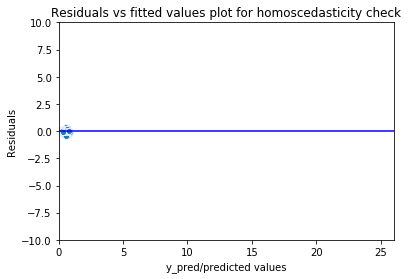

In [1706]:
# to check homoscedasticity
p = sns.scatterplot(y_train_cnt,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [1650]:
y_train_cnt

653    0.753906
576    0.754218
426    0.484881
728    0.321199
482    0.582849
         ...   
526    0.741607
578    0.834264
53     0.251388
350    0.255214
79     0.322482
Length: 510, dtype: float64

In [1651]:
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

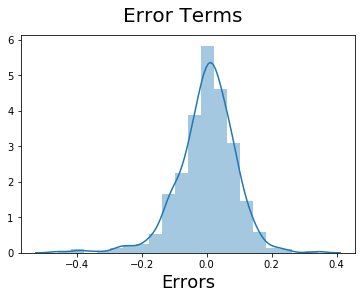

In [1652]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

Making Predictions

In [1653]:
num_vars=['temp','hum','windspeed','cnt']

In [1654]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1655]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.027397,0.319635,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.163612,0.467403,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test 

In [1656]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1657]:
# Now let's use our model to make predictions.
X_train_new.columns
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

In [1658]:
X_test_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist', 'Tuesday'],
      dtype='object')

In [1659]:
y_pred = lm.predict(X_test_lm)

Model Evaluation

In [1660]:
import statsmodels.api as sm
X_test_lms = sm.add_constant(X_test_lm)
lm = sm.OLS(y_test,X_test_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.12e-73
Time:                        12:48:06   Log-Likelihood:                 224.39
No. Observations:                 219   AIC:                            -418.8
Df Residuals:                     204   BIC:                            -368.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3397      0.049      6.872      0.000       0.242       0.437
yr             0.2486      0.012     19.932      0.000       0.224       0.273
temp           0.3014      0.054      5.599      0.000       0.195       0.408
windspeed     -0.0485      0.041     -1.170      0.244      -0.130       0.033
spring        -0.1796      0.034     -5.357      0.000      -0.246      -0.113
summer        -0.0174      0.024     -0.733      0.464      -0.064       0.029
winter         0.0753      0.027      2.769      0.006       0.022       0.129
Dec           -0.1188      0.026     -4.557      0.000      -0.170      -0.067
Jan           -0.0418      0.028     -1.499      0.135      -0.097       0.013
Jul           -0.0448      0.027     -1.635      0.104      -0.099       0.009
Nov           -0.1264      0.031     -4.042      0.000      -0.188      -0.065
Sep            0.0141      0.026      0.548      0.584      -0.037       0.065
Light Snow    -0.2130      0.040     -5.368      0.000      -0.291      -0.135
Mist          -0.0699      0.014     -5.041      0.000      -0.097      -0.043
Tuesday       -0.0282      0.018     -1.593      0.113      -0.063       0.007
==============================================================================
Omnibus:                       14.118   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.684
Skew:                          -0.506   Prob(JB):                     0.000238
Kurtosis:                       3.897   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'y_pred')

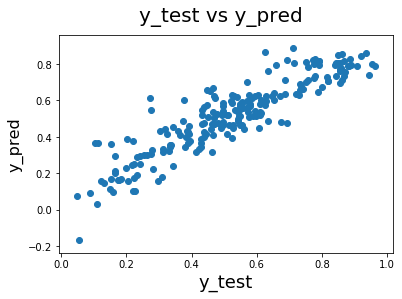

In [1661]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1662]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8147790157563536